<h1 style="color:#ff8029">Synthetic Point Cloud Data in Matpotlib</h1>
<h2 style="color:green">Lawrence G. McKnight</h2>

<hr>

<h2 style="color:green">Importing Packages</h2>

In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import PCD
from pylab import *

%matplotlib widget

<h2 style="color:green">Defining Radius, Density</h2>

In [2]:
points = []
R = 5
density = 10
N = math.ceil(density*R*math.pi)

<h2 style="color:green">Using Base Circle</h2>

In [3]:
def base_circle(radius, num_points, z=0, base=False, fill=False):
    # y (height) maps to x (radius)
    base_dict = {}

    for i in range(1, num_points + 1):
        theta = i/num_points
        x = radius * math.cos(theta*2*math.pi)
        y = radius * math.sin(theta*2*math.pi)
        points.append([x,y,z])
        
        if base == True:
            base_dict[y] = x
            
    
    return base_dict

<h2 style="color:green">Calling the Function</h2>

In [4]:
rosetta_circle = base_circle(radius=1, num_points=(N-1), base=True)

# key, val: y --> Z, x --> R
for Z, R in rosetta_circle.items():
    base_circle(radius=R, z=Z, num_points=N) 
    
point_sphere = pd.DataFrame(points)
x3 = point_sphere.iloc[:,0]
y3 = point_sphere.iloc[:,1]
z3 = point_sphere.iloc[:,2]

<h2 style="color:green">Color Mapping Theta Angle from Surface to Light Source </h2>

In [5]:
# using theta angle to 'light source' for color mapping
dist_list = []
for point in range(point_sphere.shape[0]):
    dist = PCD.slope(point_sphere.iloc[point], [10,10,15])
    dist_list.append(dist)

dist_list = np.array(dist_list)
dist_list = (dist_list-min(dist_list))/(max(dist_list)-min(dist_list))

<h2 style="color:green">Plotting the Data</h2>

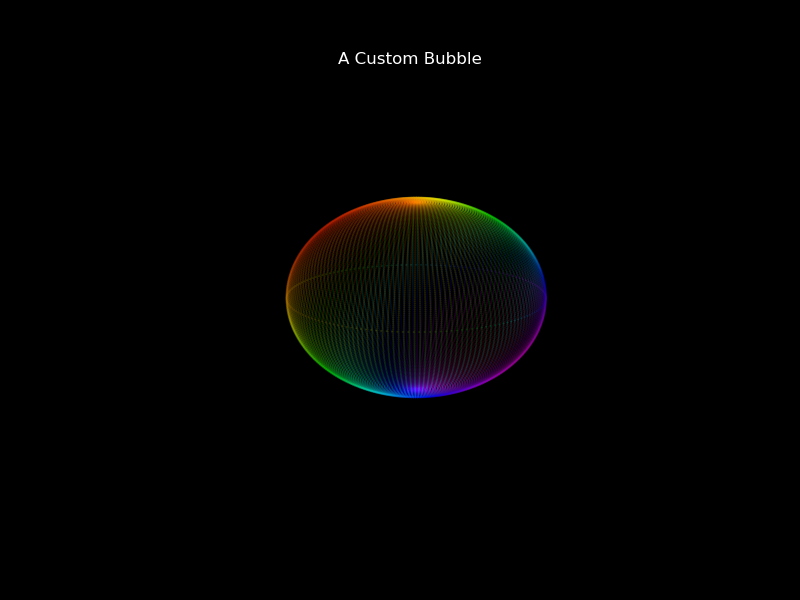

In [6]:
# control plot (in case of automatic execution) ------------------------------------------------------------------
plot = True
if plot == True:
    
    # COLOR CONTROL -- foreground, background --------------------------------------------------------------------
    fg = "white"
    bg = "black"
    
    fig = plt.figure(figsize=(8,6), facecolor="black")
    ax = fig.add_subplot(projection='3d')

    # color variability off of 'a' -------------------------------------------------------------------------------
    color = True
    if color == True: # on/off
        colors = cm.hsv(dist_list)
        colmap = cm.ScalarMappable(cmap=cm.hsv)
        colmap.set_array(dist_list)

    # ZOOM CONTROL ----------------------------------------------------------------------------------------------
    radius = False # on/off
    if radius == True:
        RADIUS = 4  # adjust this value
        ax.set_xlim3d(-RADIUS / 2, RADIUS / 2)
        ax.set_zlim3d(-RADIUS / 2, RADIUS / 2)
        ax.set_ylim3d(-RADIUS / 2, RADIUS / 2)

    # VIEWING ANGLE ---------------------------------------------------------------------------------------------
    ax.view_init(elev=15, azim=290, roll=0)
    
    # create graph ----------------------------------------------------------------------------------------------
    ax.scatter(x3, y3, z3, marker=".", s=1, c=colors, alpha=0.125)
    
    # SET AXES LABELS ------------------------------------------------------------------------------------------- 
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # SET AXES COLORS -------------------------------------------------------------------------------------------
    ax.spines['bottom'].set_color(fg)
    ax.spines['top'].set_color(fg)
    ax.spines['left'].set_color(fg)
    ax.spines['right'].set_color(fg)
    
    # AXES LABEL COLORS -----------------------------------------------------------------------------------------
    ax.xaxis.label.set_color(fg)
    ax.yaxis.label.set_color(fg)
    ax.zaxis.label.set_color(fg)
    
    # AXES TICKS ------------------------------------------------------------------------------------------------
    ax.tick_params(axis='x', colors=fg)
    ax.tick_params(axis='y', colors=fg)
    ax.tick_params(axis='z', colors=fg)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    
    # BACKGROUND ------------------------------------------------------------------------------------------------
    ax.set_facecolor(bg)
    ax.grid(visible=False, color=fg)
    ax.axis('off')
    ax.set_title('A Custom Bubble', c="white")
    
    plt.show()

<h2 style="color:green">Changing the Coloration for a Non-Opaque Surface</h2>

In [8]:
# using theta angle to 'light source' for color mapping
theta_list = []
for point in range(point_sphere.shape[0]):
    theta = PCD.slope(point_sphere.iloc[point], [10,10,15])
    theta_list.append(theta)

theta_list = np.array(theta_list)
theta_list = (theta_list-min(theta_list))/(max(theta_list)-min(theta_list))

<h3 style="color:green">Changing the Coloration for a Non-Opaque Surface</h3>

<img src="shadows.png" width="400" style="float: right; align: top;"/>

<hp style="text-align:left;">- Given a list of theta angles for every point of an object, we have estimated where light is strongest given the most direct angle. <br><br>- We can now add shadowing to parts of the object that should be hidden behind other surfaces.</hp>

